In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\revie\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## 6.1 데이터 불러오기 및 탐색

In [2]:
data=pd.read_csv("data/house_raw.csv")
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [4]:
# 결측값은 없다
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17914 entries, 0 to 17913
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17914 non-null  int64  
 1   income       17914 non-null  float64
 2   bedrooms     17914 non-null  float64
 3   households   17914 non-null  float64
 4   rooms        17914 non-null  float64
 5   house_value  17914 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 839.8 KB


In [5]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

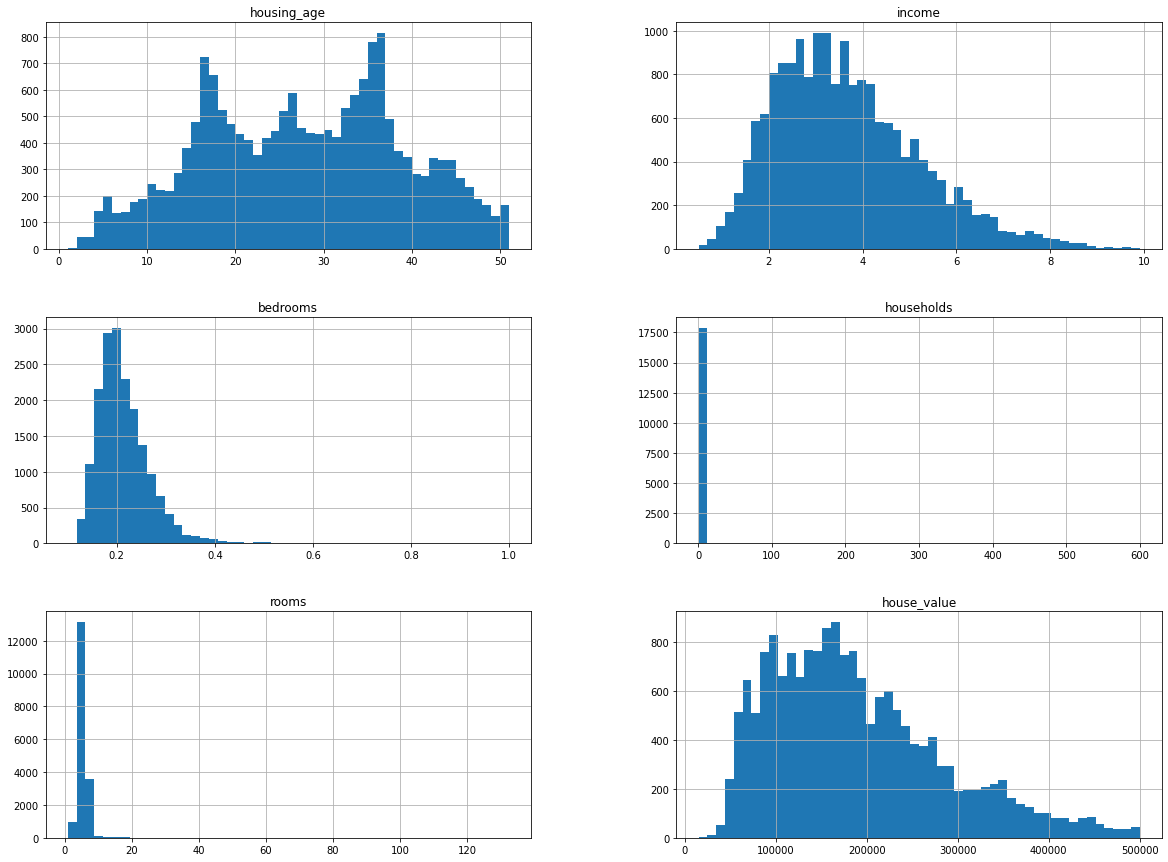

In [6]:
# bedrooms, households, rooms에 너무 큰 값 존재
data.hist(bins=50, figsize=(20,15))

## 6.2 선형회귀 적용 (정제 전 데이터)

In [9]:
X=data[data.columns[0:5]]
y=data[['house_value']]

In [10]:
# X, y를 7:3의 비율로 나누어 train set, test set으로 각각 할당
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42)

In [14]:
#훈련 데이터 및 테스트 데이터의 특성치의 단위를 동일하게 만드는 과정인 정규화 진행
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
X_scaled_minmax_test=scaler_minmax.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

LinearRegression()

In [17]:
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5463729131516732

In [18]:
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test,y_test)

-2.8220648010161544

## 6.3 데이터 정제를 위한 세부 검토

<AxesSubplot:>

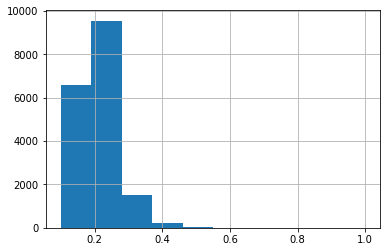

In [25]:
# bedrooms 이상치
data.bedrooms.hist()

<AxesSubplot:>

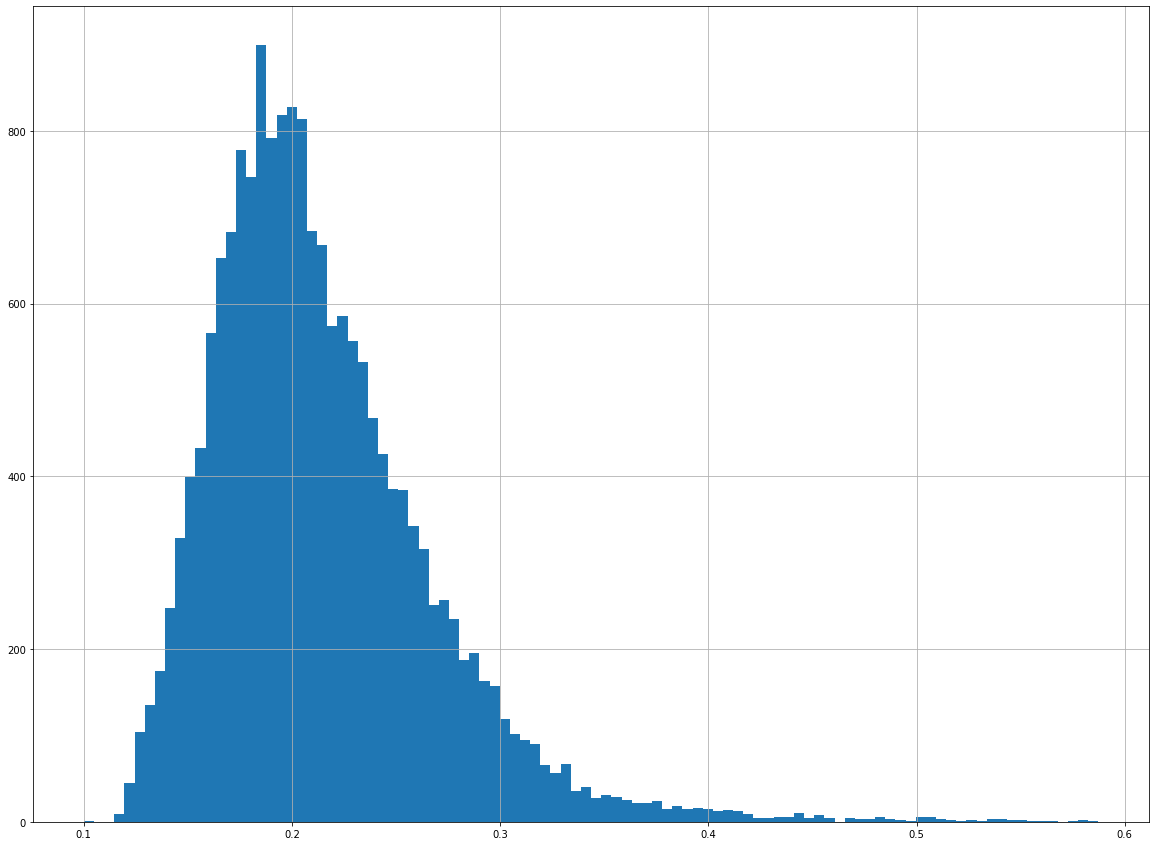

In [22]:
# bedrooms는 0.6 이상에서 매우 큰 값들이 존재
data_bedrooms=data[data.bedrooms<0.6]
data_bedrooms.bedrooms.hist(bins=100, figsize=(20,15))

In [24]:
# bedrooms 변수에서 0.6보다 큰 데이터가 14개 있다. 제거해도 전체 데이터에 영향 없을 것이다.
data_bedrooms2=data[data.bedrooms>0.6]
print(data_bedrooms2.bedrooms.value_counts())
data_bedrooms2

1.000000    3
0.602489    1
0.635258    1
0.658869    1
0.613084    1
0.662539    1
0.625887    1
0.923077    1
0.700000    1
0.627338    1
0.686114    1
0.750000    1
Name: bedrooms, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
1732,43,1.3157,0.602489,2.133660,1.911826,333300
1911,25,1.7866,0.635258,3.566327,1.678571,325000
3162,26,1.4904,0.658869,3.750779,1.598131,275000
3165,12,1.2012,0.613084,3.271233,1.465753,275000
5446,24,1.8304,0.662539,3.973545,1.708995,225000
7674,45,1.4940,0.625887,3.673981,1.768025,187500
7677,20,1.0938,0.923077,1.739130,1.130435,187500
9658,46,2.8750,1.000000,1.846154,0.846154,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11810,37,2.7634,0.700000,4.524194,1.411290,137500


<AxesSubplot:>

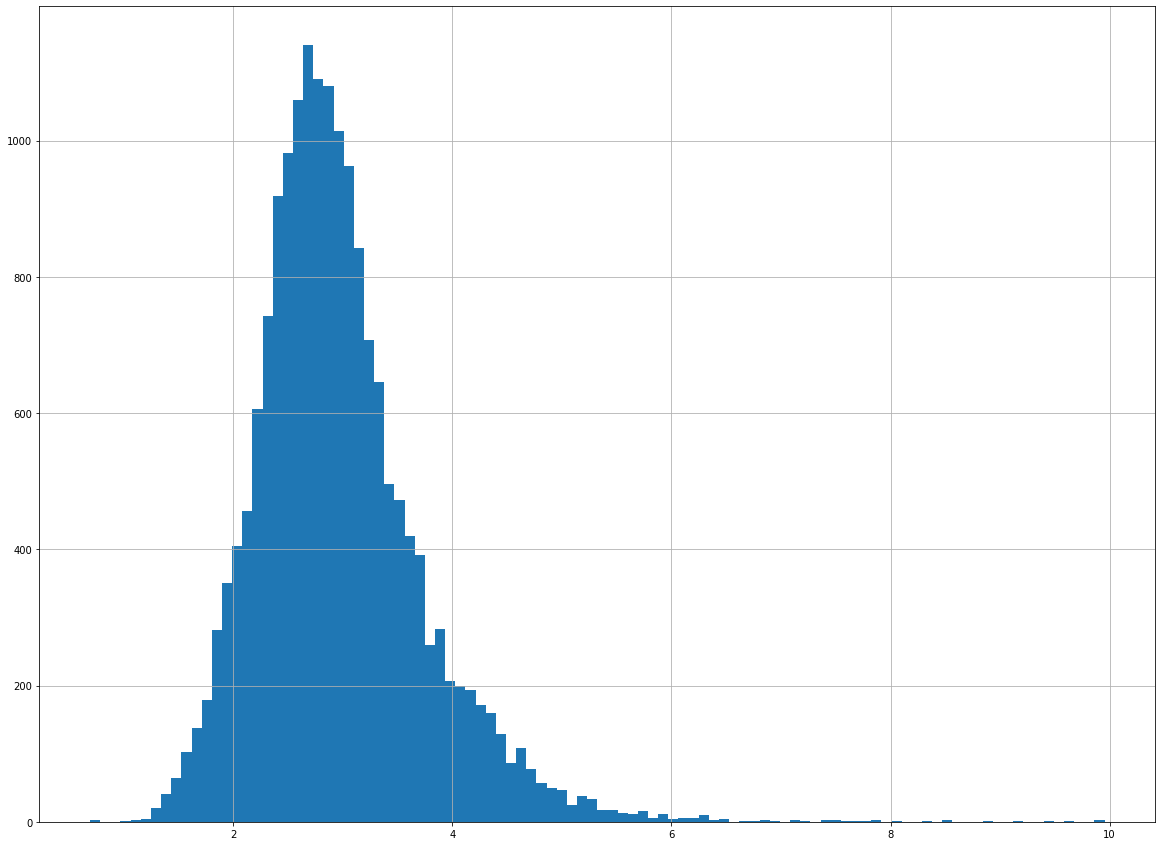

In [35]:
# households 이상치
data_households=data[data.households<10]
data_households.households.hist(bins=100, figsize=(20,15))

In [37]:
# households 변수에서 10보다 큰 데이터 약 22개->제거 가능
data_households2=data[data.households>=10]
data_households2

,housing_age,income,bedrooms,households,rooms,house_value
2420,20,1.0298,0.338658,13.693487,2.398467,300000
5398,33,3.8750,0.218310,12.234043,3.021277,225000
8003,36,4.2578,0.212528,33.952941,5.258824,183300
9617,26,5.7485,0.167702,51.400000,5.366667,162500
9625,36,4.6250,0.142857,14.000000,24.500000,162500
9703,8,1.6250,0.125000,63.750000,7.600000,162500
9713,19,0.9573,0.338843,16.048780,2.951220,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11397,13,3.4107,0.218182,12.843750,5.156250,142500
11987,41,3.5769,0.222672,18.500000,4.940000,135700


<AxesSubplot:>

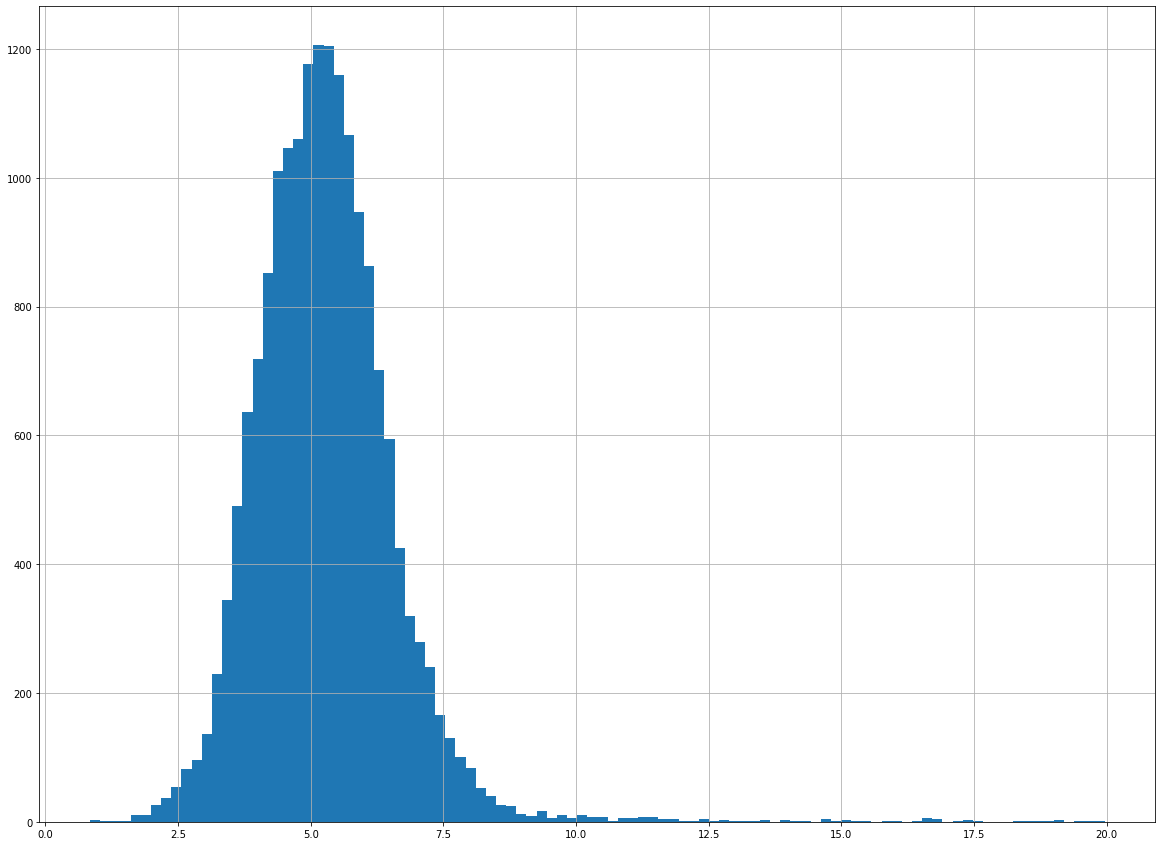

In [39]:
# rooms 이상치
data_rooms=data[data.rooms<20]
data_rooms.rooms.hist(bins=100, figsize=(20,15))

In [41]:
data_rooms2=data[data.rooms>=20]
print(data_rooms2.rooms.value_counts())
data_rooms2

24.500000     2
61.812500     1
20.033333     1
36.060606     1
26.041096     1
             ..
26.511416     1
132.533333    1
24.900000     1
26.465969     1
31.777778     1
Name: rooms, Length: 63, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
324,19,4.0714,0.177958,2.333333,61.812500,437500
457,17,2.1719,0.172918,2.581818,28.600000,420000
1140,18,5.5456,0.146182,2.273585,36.075472,360000
2146,17,3.9722,0.172642,2.608355,20.900783,313400
2858,14,4.1016,0.175109,2.136364,20.939394,283300
...,...,...,...,...,...,...
16222,11,3.1250,0.235332,2.484848,47.515152,77500
16429,16,0.4999,0.277372,1.368421,21.631579,73500
16584,10,3.1250,0.250564,2.285714,21.095238,71300
16844,25,2.6250,0.255741,1.750000,59.875000,67500


## 6.4 정제 데이터셋 생성

In [42]:
new_data=data[(data.bedrooms<0.5)&(data.households<7)&(data.rooms<12)]
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

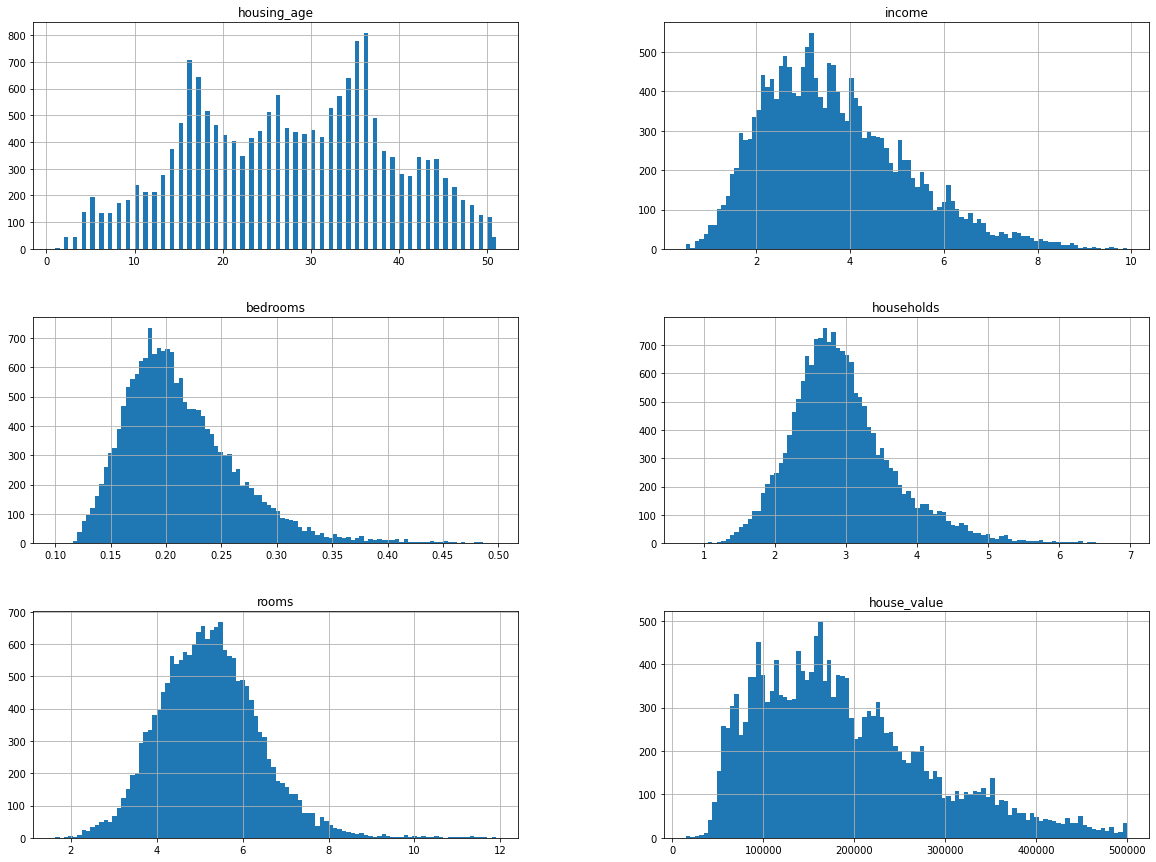

In [43]:
new_data.hist(bins=100, figsize=(20,15))

## 6.5 선형회귀 적용(정제 후 데이터)

In [44]:
# 특성 데이터 셋, 레이블 데이터 셋 나누기
X=new_data[new_data.columns[0:5]]
y=new_data[['house_value']]

In [45]:
# 7:3 train, test 나누기
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [49]:
# 데이터 MinMax 정규화
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler()
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
X_scaled_minmax_test=scaler_minmax.transform(X_test)

In [50]:
# 선형모델 적용
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

LinearRegression()

In [51]:
pred_train=model.predict(X_scaled_minmax_train)
print(f"훈련데이터 정확도 : {model.score(X_scaled_minmax_train,y_train)}")

훈련데이터 정확도 : 0.5706921210926263


In [52]:
pred_test=model.predict(X_scaled_minmax_test)
print(f"훈련데이터 정확도 : {model.score(X_scaled_minmax_test,y_test)}")

훈련데이터 정확도 : 0.5826083517811866
